In [ ]:
# Prepare a classification model using Naive Bayes for salary data 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
# import Naive Bayes Lib

from sklearn.naive_bayes import GaussianNB,BernoulliNB

In [3]:
#to split the data
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import accuracy_score,confusion_matrix

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
salary_test = pd.read_csv('SalaryData_Test.csv')
salary_train = pd.read_csv('SalaryData_Train.csv')

In [6]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [8]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
labels=['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

In [11]:
# changing the categorical data in numerical
label_encode = LabelEncoder()

for i in labels:
    salary_train[i] = label_encode.fit_transform(salary_train[i])
    salary_test[i] = label_encode.fit_transform(salary_test[i])

In [12]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [ ]:
# Identifing Most Relative Features 

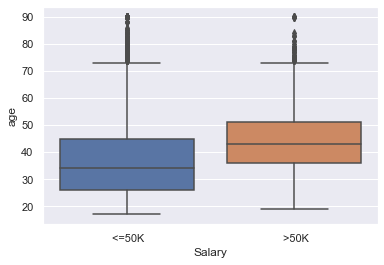

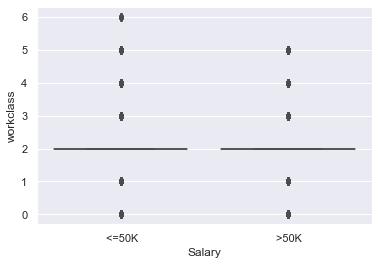

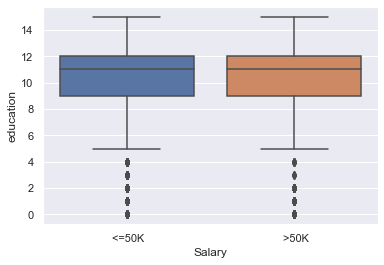

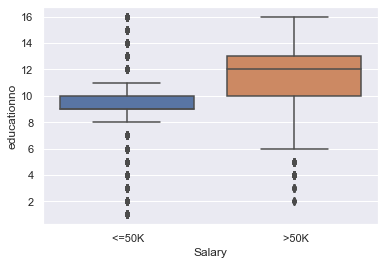

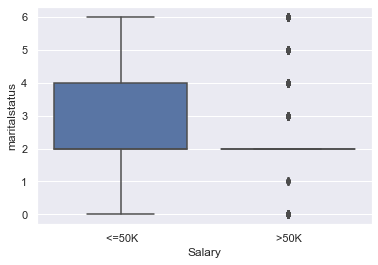

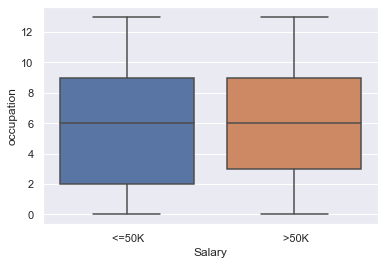

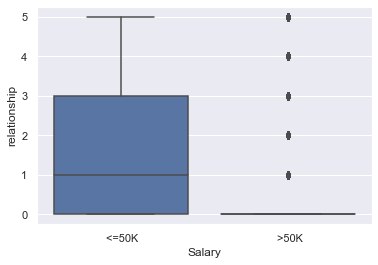

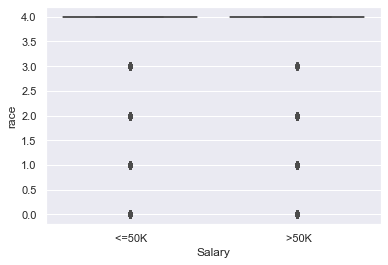

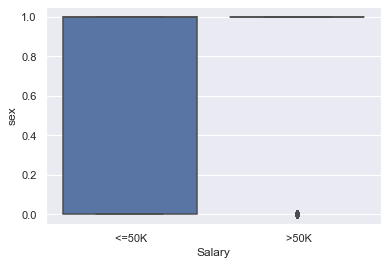

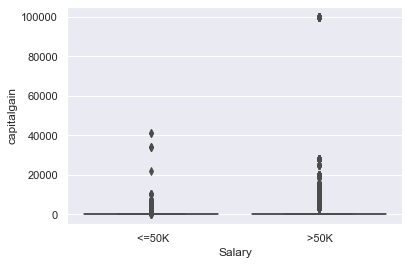

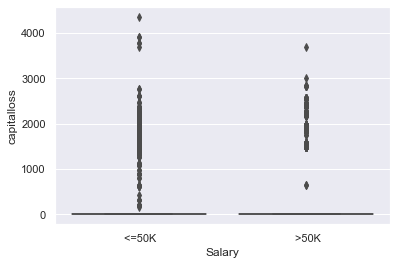

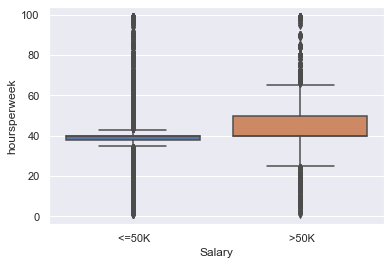

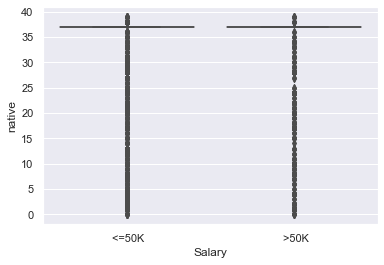

In [13]:
for i in salary_train.columns[0:-1]:
    sns.boxplot(salary_train['Salary'],salary_train[i])
    plt.show()

In [ ]:
# overlapping for all parameters

### Considering all the Features  

In [14]:
# splitting the data 

x_train = salary_train.iloc[:1000,0:13]
y_train = salary_train.iloc[:1000,13]

x_test = salary_test.iloc[:500,0:13]
y_test = salary_test.iloc[:500,13]

In [15]:
# creating Model
model_g = GaussianNB()

# fitting the Model
model_g.fit(x_train,y_train)

# predicting on Train Data
pred_train_g = model_g.predict(x_train)

# finding Accuracy & Confusion Matrix 

print(f'The Accuracy is = {accuracy_score(y_train,pred_train_g)*100}%')
print(f'The Confussion Matrix is \n {confusion_matrix(y_train,pred_train_g)}')

The Accuracy is = 80.10000000000001%
The Confussion Matrix is 
 [[706  50]
 [149  95]]


In [16]:
# predicting on Testing Data
pred_test_g = model_g.predict(x_test)

# finding Accuracy & Confusion Matrix 

print(f'The Accuracy is = {accuracy_score(y_test,pred_test_g)*100}%')
print(f'The Confussion Matrix is \n {confusion_matrix(y_test,pred_test_g)}')

The Accuracy is = 80.0%
The Confussion Matrix is 
 [[354  28]
 [ 72  46]]


In [ ]:
# similar Accuracy achived by SVM 

### Considering One Features at A Time

In [17]:
import itertools

for i in itertools.combinations(salary_train.columns[0:-1],1):
    # creating Model
    model_g = GaussianNB()

    # fitting the Model
    model_g.fit(x_train[list(i)],y_train)

    # predicting on Train Data & Test Data
    pred_train_g = model_g.predict(x_train[list(i)])
    pred_test_g = model_g.predict(x_test[list(i)])
    
    # finding Accuracy 
    print(f'The Accuracy on Train Data of {i} is = {accuracy_score(y_train,pred_train_g)*100}%')
    print(f'The Accuracy on Test Data of {i} is = {accuracy_score(y_test,pred_test_g)*100}%')
    print()

The Accuracy on Train Data of ('age',) is = 75.6%
The Accuracy on Test Data of ('age',) is = 76.4%

The Accuracy on Train Data of ('workclass',) is = 74.9%
The Accuracy on Test Data of ('workclass',) is = 74.2%

The Accuracy on Train Data of ('education',) is = 75.6%
The Accuracy on Test Data of ('education',) is = 76.4%

The Accuracy on Train Data of ('educationno',) is = 77.5%
The Accuracy on Test Data of ('educationno',) is = 76.0%

The Accuracy on Train Data of ('maritalstatus',) is = 75.6%
The Accuracy on Test Data of ('maritalstatus',) is = 76.4%

The Accuracy on Train Data of ('occupation',) is = 75.6%
The Accuracy on Test Data of ('occupation',) is = 76.4%

The Accuracy on Train Data of ('relationship',) is = 75.6%
The Accuracy on Test Data of ('relationship',) is = 76.4%

The Accuracy on Train Data of ('race',) is = 75.6%
The Accuracy on Test Data of ('race',) is = 76.4%

The Accuracy on Train Data of ('sex',) is = 75.6%
The Accuracy on Test Data of ('sex',) is = 76.4%

The Ac

### Considering 2 Features at a Time

In [18]:
import itertools

for i in itertools.combinations(salary_train.columns[0:-1],2):
    # creating Model
    model_g = GaussianNB()

    # fitting the Model
    model_g.fit(x_train[list(i)],y_train)

    # predicting on Train Data & Test Data
    pred_train_g = model_g.predict(x_train[list(i)])
    pred_test_g = model_g.predict(x_test[(list(i))])
    
    # finding Accuracy 
    print(f'The Accuracy on Train Data of {i} is = {accuracy_score(y_train,pred_train_g)*100}%')
    print(f'The Accuracy on Test Data of {i} is = {accuracy_score(y_test,pred_test_g)*100}%')
    print()

The Accuracy on Train Data of ('age', 'workclass') is = 74.1%
The Accuracy on Test Data of ('age', 'workclass') is = 74.2%

The Accuracy on Train Data of ('age', 'education') is = 75.6%
The Accuracy on Test Data of ('age', 'education') is = 76.4%

The Accuracy on Train Data of ('age', 'educationno') is = 78.2%
The Accuracy on Test Data of ('age', 'educationno') is = 77.4%

The Accuracy on Train Data of ('age', 'maritalstatus') is = 76.1%
The Accuracy on Test Data of ('age', 'maritalstatus') is = 77.2%

The Accuracy on Train Data of ('age', 'occupation') is = 75.6%
The Accuracy on Test Data of ('age', 'occupation') is = 76.4%

The Accuracy on Train Data of ('age', 'relationship') is = 75.6%
The Accuracy on Test Data of ('age', 'relationship') is = 76.4%

The Accuracy on Train Data of ('age', 'race') is = 75.6%
The Accuracy on Test Data of ('age', 'race') is = 76.4%

The Accuracy on Train Data of ('age', 'sex') is = 75.6%
The Accuracy on Test Data of ('age', 'sex') is = 76.4%

The Accura

The Accuracy on Test Data of ('race', 'hoursperweek') is = 76.2%

The Accuracy on Train Data of ('race', 'native') is = 74.3%
The Accuracy on Test Data of ('race', 'native') is = 75.2%

The Accuracy on Train Data of ('sex', 'capitalgain') is = 77.60000000000001%
The Accuracy on Test Data of ('sex', 'capitalgain') is = 78.8%

The Accuracy on Train Data of ('sex', 'capitalloss') is = 75.4%
The Accuracy on Test Data of ('sex', 'capitalloss') is = 76.4%

The Accuracy on Train Data of ('sex', 'hoursperweek') is = 75.3%
The Accuracy on Test Data of ('sex', 'hoursperweek') is = 75.0%

The Accuracy on Train Data of ('sex', 'native') is = 74.8%
The Accuracy on Test Data of ('sex', 'native') is = 75.2%

The Accuracy on Train Data of ('capitalgain', 'capitalloss') is = 77.4%
The Accuracy on Test Data of ('capitalgain', 'capitalloss') is = 78.8%

The Accuracy on Train Data of ('capitalgain', 'hoursperweek') is = 77.60000000000001%
The Accuracy on Test Data of ('capitalgain', 'hoursperweek') is = 7